# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'
city_url = f'{url}?q=rongelap&appid={weather_api_key}&units=metric'
city_weather = requests.get(city_url).json()
pprint(city_weather)


{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 11.1635, 'lon': 166.8941},
 'dt': 1689491254,
 'id': 7306520,
 'main': {'feels_like': 32.79,
          'grnd_level': 1008,
          'humidity': 77,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 28.48,
          'temp_max': 28.48,
          'temp_min': 28.48},
 'name': 'Rongelap',
 'sys': {'country': 'MH', 'sunrise': 1689446203, 'sunset': 1689491980},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 83, 'gust': 6.34, 'speed': 5.73}}


In [44]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rongelap
Processing Record 2 of Set 1 | ilhabela
Processing Record 3 of Set 1 | griffith
Processing Record 4 of Set 1 | tofol
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | olyokminsk
Processing Record 15 of Set 1 | tabuk
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | katoya
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | golfito
Processing Record 20 of Set 1 | higuera de zaragoza
Processing Record 21 of Set 1 | port-aux-francais
Processing Record

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rongelap,11.1635,166.8941,28.48,77,36,5.73,MH,1689491254
1,ilhabela,-23.7781,-45.3581,16.68,85,0,1.81,BR,1689491255
2,griffith,41.5284,-87.4237,21.05,91,0,2.06,US,1689491255
3,tofol,5.3248,163.0078,25.88,94,100,1.54,FM,1689491255
4,adamstown,-25.0660,-130.1015,21.11,88,100,5.07,PN,1689491255


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,28.48,77,36,5.73,MH,1689491254
1,ilhabela,-23.7781,-45.3581,16.68,85,0,1.81,BR,1689491255
2,griffith,41.5284,-87.4237,21.05,91,0,2.06,US,1689491255
3,tofol,5.3248,163.0078,25.88,94,100,1.54,FM,1689491255
4,adamstown,-25.0660,-130.1015,21.11,88,100,5.07,PN,1689491255


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

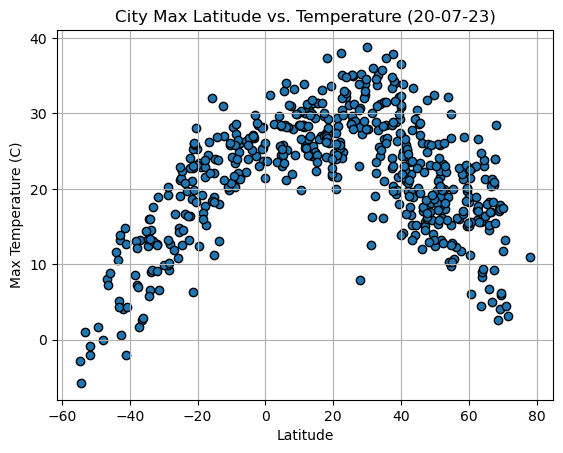

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (20-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

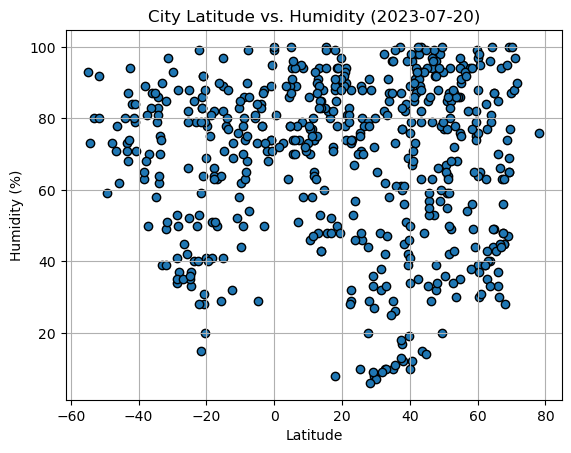

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

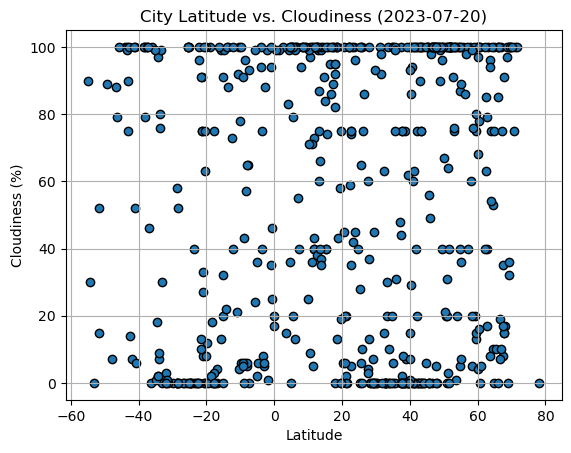

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

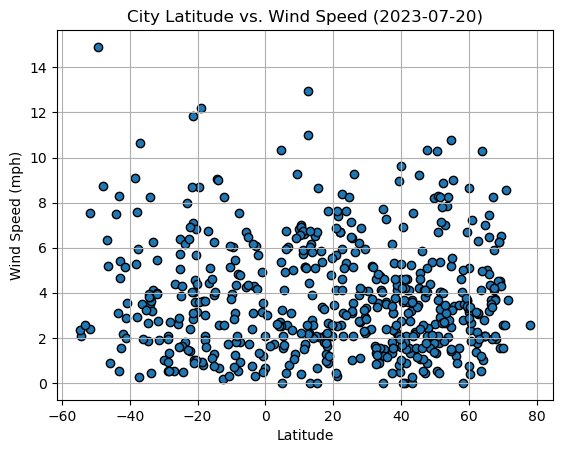

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title):
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    plt.scatter(x, y, edgecolor="black")

    predicted_values = slope * x + intercept

    plt.plot(x, predicted_values, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(f"The r-value is: {r_value}")

    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, (min(x), max(y)), fontsize=12, color="red")

    plt.show()

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,28.48,77,36,5.73,MH,1689491254
2,griffith,41.5284,-87.4237,21.05,91,0,2.06,US,1689491255
3,tofol,5.3248,163.0078,25.88,94,100,1.54,FM,1689491255
5,stanley,54.8680,-1.6985,15.16,86,40,10.80,GB,1689491256
6,ribeira grande,38.5167,-28.7000,19.32,82,75,2.24,PT,1689491256


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilhabela,-23.7781,-45.3581,16.68,85,0,1.81,BR,1689491255
4,adamstown,-25.0660,-130.1015,21.11,88,100,5.07,PN,1689491255
7,east london,-33.0153,27.9116,17.52,39,0,4.12,ZA,1689491256
8,puerto ayora,-0.7393,-90.3518,23.64,95,46,3.54,EC,1689491257
16,hermanus,-34.4187,19.2345,16.00,83,97,3.95,ZA,1689491259


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6229963592580764


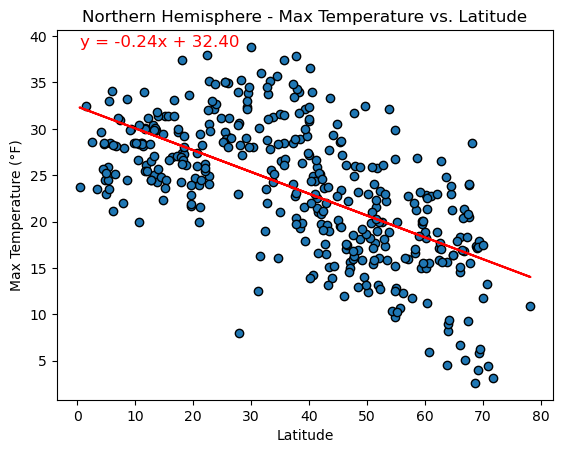

In [66]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                              "Latitude", "Max Temperature (°F)", 
                              "Northern Hemisphere - Max Temperature vs. Latitude")

The r-value is: 0.8483713264699858


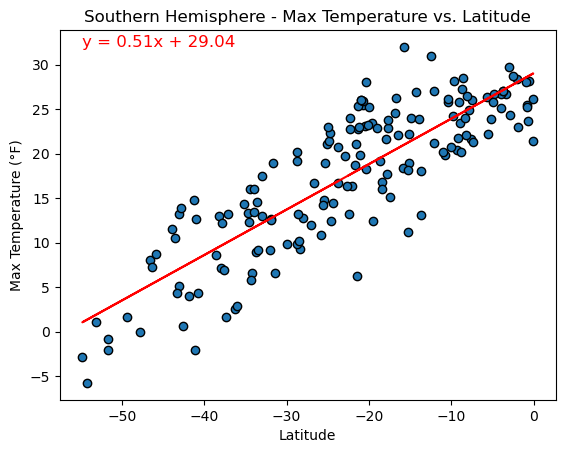

In [67]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°F)", 
                              "Southern Hemisphere - Max Temperature vs. Latitude")

**Discussion about the linear relationship:** There is a negative linear relationship between latitude and maximum temperature in the Northern Hemisphere. As latitude increases, the maximum temperature tends to decrease. The negative slope of the regression line indicates that, on average, temperatures decrease as we move away from the equator towards higher latitudes in the Northern Hemisphere.

There is a positive linear relationship between latitude and maximum temperature in the Southern Hemisphere. As latitude increases, the maximum temperature tends to increase. The positive slope of the regression line suggests that, on average, temperatures increase as we move closer to the equator from lower latitudes in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.09071804311139411


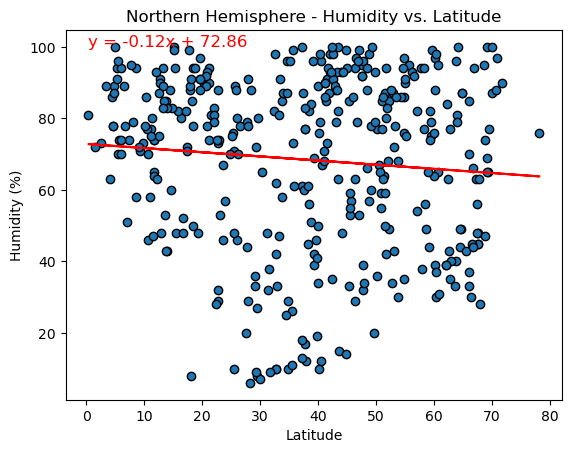

In [68]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 
                              "Northern Hemisphere - Humidity vs. Latitude")

The r-value is: 0.004115639217864832


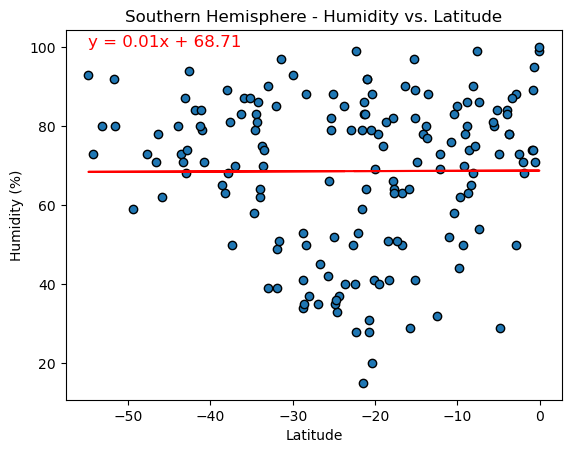

In [69]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 
                              "Southern Hemisphere - Humidity vs. Latitude")

**Discussion about the linear relationship:** In both Hemisphere there is no strong linear relationship between humidity and latitude. The scattered data points and the relatively flat regression line indicate that there is no clear trend or correlation between humidity and latitude in both region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04085516165126577


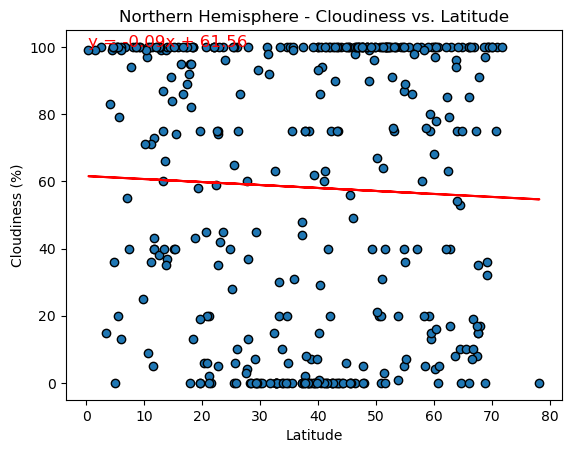

In [70]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 
                              "Northern Hemisphere - Cloudiness vs. Latitude")

The r-value is: -0.07624870429973434


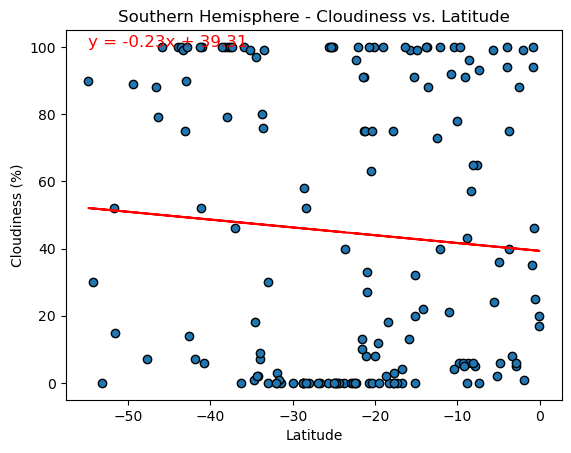

In [71]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 
                              "Southern Hemisphere - Cloudiness vs. Latitude")


**Discussion about the linear relationship:** In both Hemisphere there is no strong linear relationship between cloudiness and latitude. The data points are widely scattered, and the regression line is relatively flat, indicating a weak correlation, if any, between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.029320794641463387


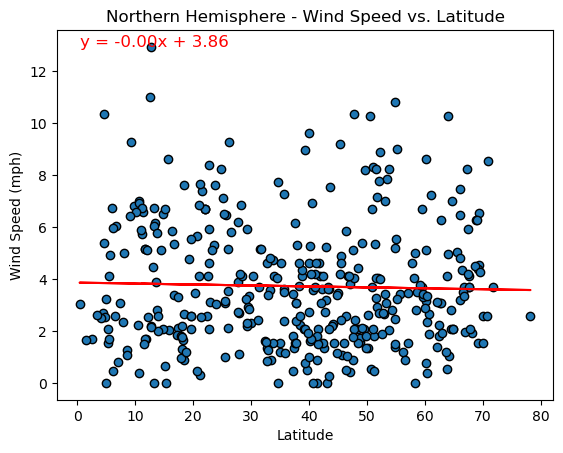

In [72]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", 
                              "Northern Hemisphere - Wind Speed vs. Latitude")


The r-value is: -0.1319945792239255


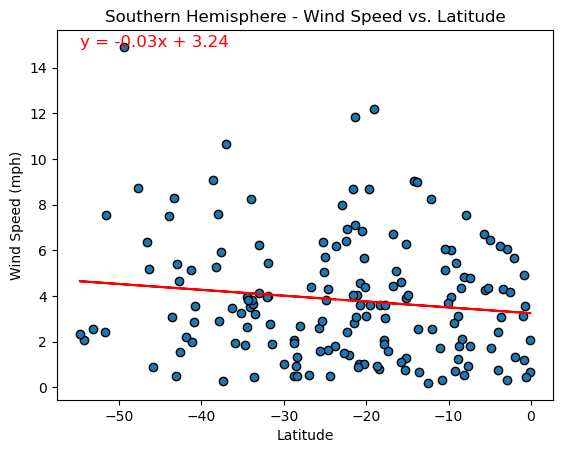

In [73]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", 
                              "Southern Hemisphere - Wind Speed vs. Latitude")


**Discussion about the linear relationship:** There is no strong linear relationship between wind speed and latitude in the Northern Hemisphere. The data points are widely scattered, and the regression line has a minimal slope, indicating a weak correlation between wind speed and latitude. Similar to the Northern Hemisphere, there is no strong linear relationship between wind speed and latitude in the Southern Hemisphere. Perhaps, there is a minimum negative linear relationship, as latitude increases, the wind speed tends to decrease.